In [ ]:
pip install xgboost


In [ ]:
import xgboost as xgb


# Predictive Analytics for Walmart Sales

## Objective
Develop a predictive model to forecast Walmart sales for the next month. This project aims to provide insights into sales trends and help Walmart make data-driven decisions.

## Data Collection
Load the dataset from a reliable source.


In [1]:


import zipfile
import pandas as pd

# Unzipping the file
with zipfile.ZipFile('/Users/harshabojanki/Documents/WalmartSalesData/train.csv.zip', 'r') as zip_ref:
    zip_ref.extractall('/Users/harshabojanki/Documents/WalmartSalesData/')  # Unzip to the new directory

# Loading the dataset
data = pd.read_csv('/Users/harshabojanki/Documents/WalmartSalesData/train.csv')
data.head()


,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


## Data Cleaning
Handle missing values, convert data types, and treat outliers.


In [2]:
# Handle missing values
data = data.dropna()

# Convert data types
data['Date'] = pd.to_datetime(data['Date'])

# Remove or treat outliers
data = data[(data['Weekly_Sales'] > 0)]

data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 420212 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         420212 non-null  int64         
 1   Dept          420212 non-null  int64         
 2   Date          420212 non-null  datetime64[ns]
 3   Weekly_Sales  420212 non-null  float64       
 4   IsHoliday     420212 non-null  bool          
dtypes: bool(1), datetime64[ns](1), float64(1), int64(2)
memory usage: 16.4 MB


## Exploratory Data Analysis (EDA)
Analyze sales trends over time, visualize sales distribution, and identify seasonal patterns.


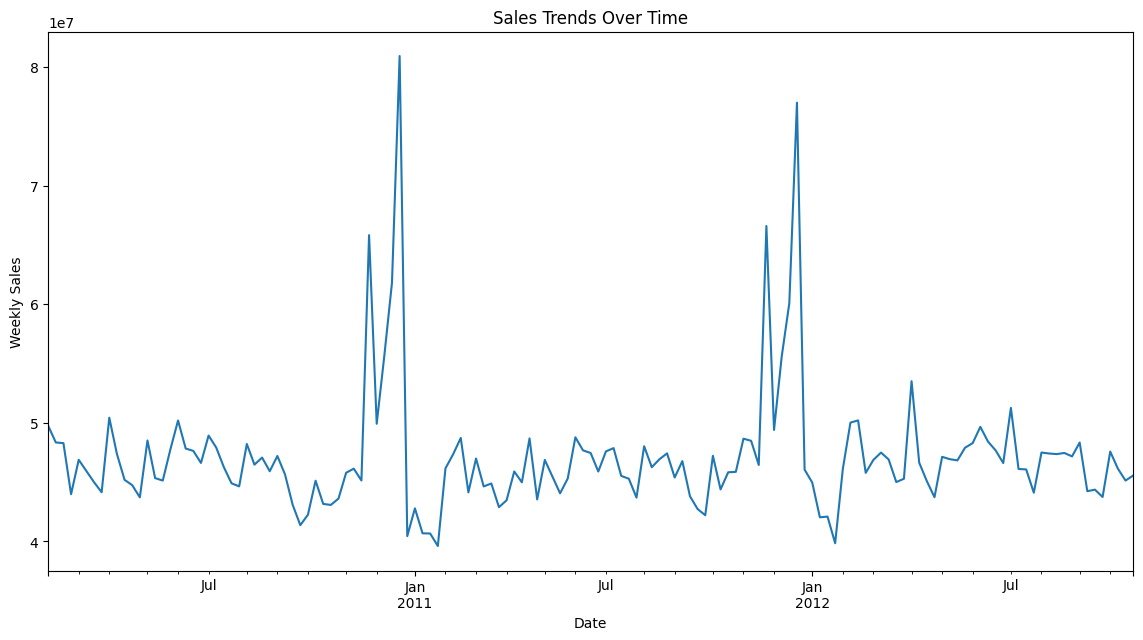

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sales trends over time
plt.figure(figsize=(14, 7))
data.groupby('Date')['Weekly_Sales'].sum().plot()
plt.title('Sales Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.show()

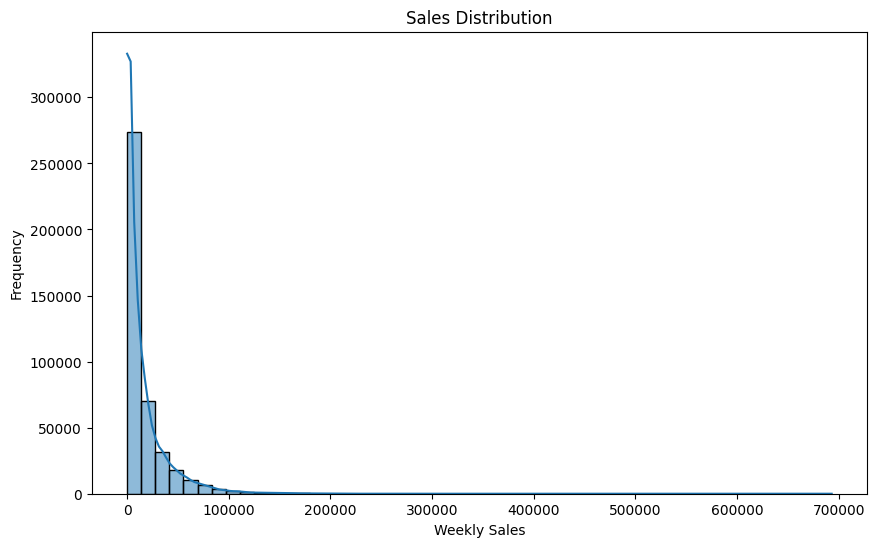

In [4]:
# Sales distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['Weekly_Sales'], bins=50, kde=True)
plt.title('Sales Distribution')
plt.xlabel('Weekly Sales')
plt.ylabel('Frequency')
plt.show()

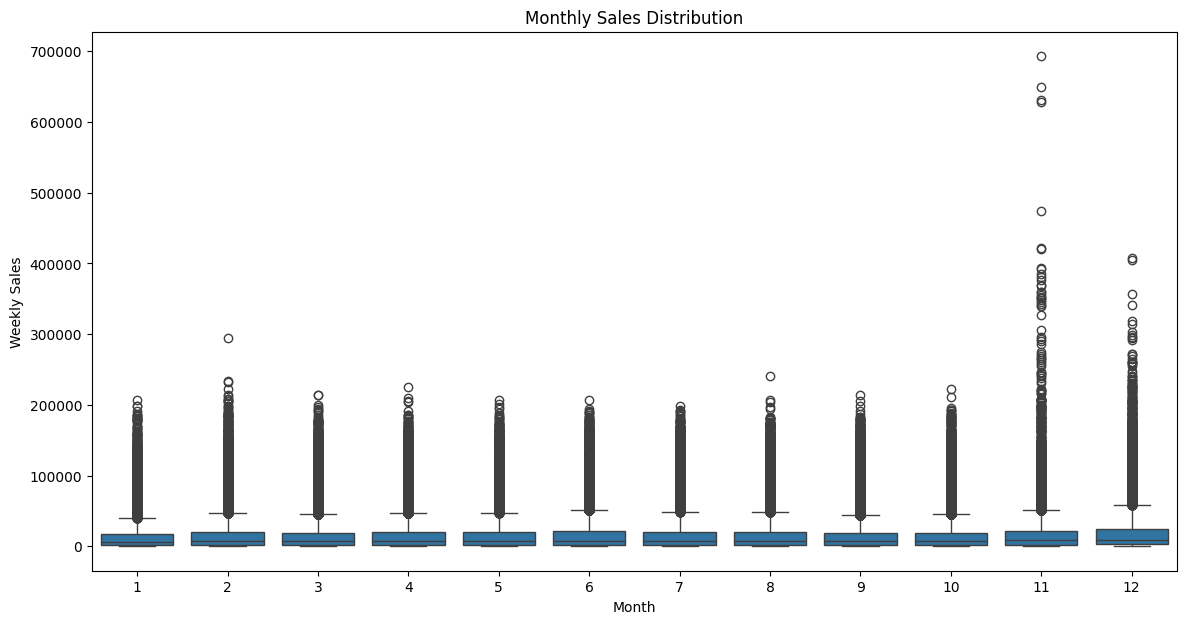

In [5]:
# Seasonal patterns
plt.figure(figsize=(14, 7))
data['Month'] = data['Date'].dt.month
sns.boxplot(x='Month', y='Weekly_Sales', data=data)
plt.title('Monthly Sales Distribution')
plt.xlabel('Month')
plt.ylabel('Weekly Sales')
plt.show()


## Feature Engineering
Create time-based features, generate lag features, and encode categorical variables.


In [6]:
# Create time-based features
data['Month'] = data['Date'].dt.month
data['DayOfWeek'] = data['Date'].dt.dayofweek

# Generate lag features
data['Sales_Lag_1'] = data['Weekly_Sales'].shift(1)
data['Sales_Lag_7'] = data['Weekly_Sales'].shift(7)

# Encode categorical variables
data = pd.get_dummies(data, columns=['Store', 'Dept'])

data.dropna(inplace=True)
data.head()


,Date,Weekly_Sales,IsHoliday,Month,DayOfWeek,Sales_Lag_1,Sales_Lag_7,Store_1,Store_2,Store_3,...,Dept_90,Dept_91,Dept_92,Dept_93,Dept_94,Dept_95,Dept_96,Dept_97,Dept_98,Dept_99
7,2010-03-26,26229.21,False,3,4,22136.64,24924.50,True,False,False,...,False,False,False,False,False,False,False,False,False,False
8,2010-04-02,57258.43,False,4,4,26229.21,46039.49,True,False,False,...,False,False,False,False,False,False,False,False,False,False
9,2010-04-09,42960.91,False,4,4,57258.43,41595.55,True,False,False,...,False,False,False,False,False,False,False,False,False,False
10,2010-04-16,17596.96,False,4,4,42960.91,19403.54,True,False,False,...,False,False,False,False,False,False,False,False,False,False
11,2010-04-23,16145.35,False,4,4,17596.96,21827.90,True,False,False,...,False,False,False,False,False,False,False,False,False,False


## Model Selection
Compare different models (Linear Regression, Decision Tree, Random Forest, XGBoost) using cross-validation.


In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# Prepare data for modeling
X = data.drop(['Date', 'Weekly_Sales'], axis=1)
y = data['Weekly_Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'XGBoost': XGBRegressor()
}

# Compare models using cross-validation
for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    rmse_scores = (-scores)**0.5
    print(f'{name} RMSE: {rmse_scores.mean()}')


Linear Regression RMSE: 7061.846358017545
Decision Tree RMSE: 6664.371166161531
